In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv


**Overview**

This data was given by an airline organization and the actual name of the company is not given due to various purposes. The name of the airline has been changed to Invistico Airlines.

The dataset comprises information about customers who have previously flown with the airline. It includes customer feedback across different contexts and flight-related data. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience

Additionally, the airline aims to determine which aspects of their services require more focus to enhance customer satisfaction and generate greater overall satisfaction among passengers.

**Proposal**

For this analysis, I will be creating four machine learning models: Binomial Logistic Regression, Decision Tree, Random Forest, and XGBoost. These four models are well-suited for predicting customer satisfaction for several reasons.

1. **Binomial Logistic Regression**- This model is appropriate when the outcome variable is binary, such as predicting whether a customer is satisfied or not. It provides interpretable coefficients that can help understand the impact of each predictor variable on the likelihood of satisfaction.

2. **Decision Tree**- Decision trees are intuitive and easy to interpret, making them valuable for understanding the factors that influence customer satisfaction. They can capture nonlinear relationships between predictors and outcomes and handle both numerical and categorical data effectively.

3. **Random Forest**- Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. It is robust to overfitting, handles large datasets well, and often provides high predictive accuracy. Random Forest can capture complex interactions between features, which is beneficial for modeling customer satisfaction.

4. **XGBoost**- XGBoost is a powerful gradient boosting algorithm known for its efficiency and accuracy in predictive modeling tasks. It builds a strong predictive model by iteratively improving upon weak models. XGBoost can handle missing data, feature importance ranking, and is widely used in competitions and industry applications due to its excellent performance.

By employing these four machine learning models, I can leverage their respective strengths to comprehensively analyze and predict customer satisfaction. Each model offers unique advantages, from interpretability and simplicity to predictive power and robustness, contributing to a comprehensive understanding of customer behavior and preferences.



In [115]:
# Import necessary libraries and packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Load in the dataset
invistico= pd.read_csv('/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv')

In [117]:
# View the data
invistico.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [118]:
invistico.shape

(129880, 23)

In [119]:
# Inspect columns
invistico.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [120]:
# Check datatypes
invistico.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [121]:
# Customer satisfaction
invistico['satisfaction'].value_counts(dropna= False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [122]:
# Satisfaction percentage
satisfaction_percentage= invistico['satisfaction'].value_counts(normalize= True) * 100
print(satisfaction_percentage)

satisfaction
satisfied       54.73283
dissatisfied    45.26717
Name: proportion, dtype: float64


While this is a simple and straightforward calculation, the value of 54.7% satisfied customers can be compared to the logistic regression model's accuracy.

In [123]:
# Missing values
invistico.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

There are only 393 missing values out of the 129,880 values. Since this is a tiny percentage of the total, I will proceed to drop these rows. 

In [124]:
# Drop missing values
airline= invistico.dropna(axis=0).reset_index(drop= True)

In [125]:
# Confirming values are dropped
airline.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [126]:
# Inflight entertainment to float
airline= airline.astype({'Inflight entertainment': float})

In [127]:
# Convert categorical column into numeric
airline['satisfaction']= OneHotEncoder(drop= 'first').fit_transform(airline[['satisfaction']]).toarray()

In [128]:
# Examine OneHotEncoding
airline.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [129]:
# Create train and test data
X= airline[['Inflight entertainment']]
y= airline[['satisfaction']]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [130]:
# Build and fit logistic regression model
clf= LogisticRegression().fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
# Output parameters
clf.coef_

array([[0.99751462]])

In [132]:
# Output parameters
clf.intercept_

array([-3.19355406])

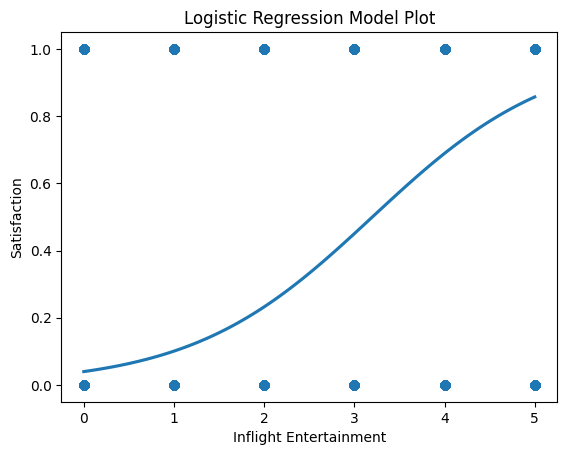

In [133]:
# Plot of the model
sns.regplot(data= airline, x= 'Inflight entertainment', y= 'satisfaction', logistic= True, ci= None)
plt.xlabel('Inflight Entertainment')
plt.ylabel('Satisfaction')
plt.title('Logistic Regression Model Plot')
plt.show()

**Logistic Regression Model Plot**

The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn’t provide much insight into the data points, as Inflight entertainment is categorical.

In [134]:
# Predicted labels
y_pred= clf.predict(X_test)
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


In [135]:
# Output probability
clf.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

In [136]:
# Use predict to output 0's and 1's
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [137]:
# Print out scores
print('Accuracy: ', '%.6f' % metrics.accuracy_score(y_test, y_pred))
print('Precision: ', '%.6f' % metrics.precision_score(y_test, y_pred))
print('Recall: ', '%.6f' % metrics.recall_score(y_test, y_pred))
print('F1 Score: ', '%6f' % metrics.f1_score(y_test, y_pred))

Accuracy:  0.801529
Precision:  0.816142
Recall:  0.821530
F1 Score:  0.818827


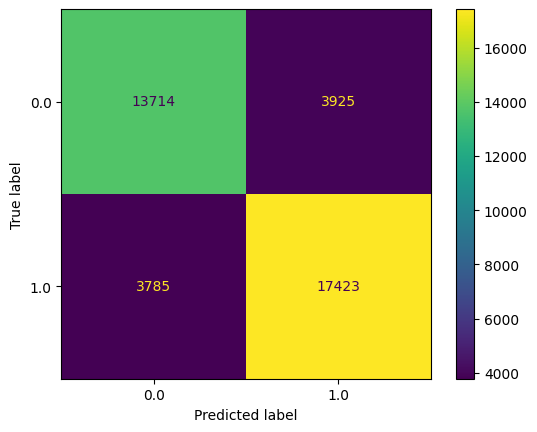

In [138]:
# Confusion matrix
cm= confusion_matrix(y_test, y_pred, labels= clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= clf.classes_)
disp.plot()

**Confusion Matrix**

Two of the quadrants are under 4,000, which are relatively low numbers. Interpreting the matrix, it’s clear that these numbers relate to false positives and false negatives.

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

**Findings**

The logistic regression model accurately predicted satisfaction 80.2% of the time. 

The confusion matrix is useful, as it displays a similar amount of true positives and true negatives.

**To the Stakeholders**

Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. The model is 80.2% accurate. This is an improvement over the dataset’s customer satisfaction rate of 54.7 percent.

The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers.